# General Process

## Background :

We have a dataset that contains columns describing airline passenger satisfaction. From this dataset, it will be determined which features affect passenger satisfaction. And based on these features will predict whether passengers are satisfied or not. 

## Import Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

## Read Dataset

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Digital Skola/Final Project/Dataset7_Airline_Satisfaction.csv')
#df = pd.read_csv('ds_airline_satisfaction.csv')

In [4]:
df.head(10).style.background_gradient(cmap='Dark2_r')

,Customer Type,Class,Gender,Age,Type of Travel,Flight Distance,Checkin service,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Loyal Customer,Eco,Female,65,Personal Travel,265,5,0,0.000000,satisfied
1,Loyal Customer,Business,Male,47,Personal Travel,2464,2,310,305.000000,satisfied
2,Loyal Customer,Eco,Female,15,Personal Travel,2138,4,0,0.000000,satisfied
3,Loyal Customer,Eco,Female,60,Personal Travel,623,4,0,0.000000,satisfied
4,Loyal Customer,Eco,Female,70,Personal Travel,354,4,0,0.000000,satisfied
5,Loyal Customer,Eco,Male,30,Personal Travel,1894,5,0,0.000000,satisfied
6,Loyal Customer,Eco,Female,66,Personal Travel,227,5,17,15.000000,satisfied
7,Loyal Customer,Eco,Male,10,Personal Travel,1812,5,0,0.000000,satisfied
8,Loyal Customer,Business,Female,56,Personal Travel,73,5,0,0.000000,satisfied
9,Loyal Customer,Eco,Male,22,Personal Travel,1556,3,30,26.000000,satisfied


# Data Preprocessing

## Check data type

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Customer Type               129880 non-null  object 
 1   Class                       129880 non-null  object 
 2   Gender                      129880 non-null  object 
 3   Age                         129880 non-null  int64  
 4   Type of Travel              129880 non-null  object 
 5   Flight Distance             129880 non-null  int64  
 6   Checkin service             129880 non-null  int64  
 7   Departure Delay in Minutes  129880 non-null  int64  
 8   Arrival Delay in Minutes    129487 non-null  float64
 9   satisfaction                129880 non-null  object 
dtypes: float64(1), int64(4), object(5)
memory usage: 9.9+ MB


Notes:

*   Our dataset consists of 129880 rows and 10 columns.
*   float(1), int(4), object(5)
*   All feature types is correct.




In [6]:
df.describe().T.style.background_gradient(cmap='Oranges')

,count,mean,std,min,25%,50%,75%,max
Age,129880.000000,39.427957,15.119360,7.000000,27.000000,40.000000,51.000000,85.000000
Flight Distance,129880.000000,1981.409055,1027.115606,50.000000,1359.000000,1925.000000,2544.000000,6951.000000
Checkin service,129880.000000,3.340807,1.260582,0.000000,3.000000,3.000000,4.000000,5.000000
Departure Delay in Minutes,129880.000000,14.713713,38.071126,0.000000,0.000000,0.000000,12.000000,1592.000000
Arrival Delay in Minutes,129487.000000,15.091129,38.465650,0.000000,0.000000,0.000000,13.000000,1584.000000


## Inkonsistensi Data

Homogenize Data

In [7]:
df['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [8]:
df['Customer Type'] = df['Customer Type'].str.lower()
df['Customer Type'].unique()

array(['loyal customer', 'disloyal customer'], dtype=object)

In [9]:
df['Class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In [10]:
df['Class'] = df['Class'].str.lower()
df['Class'].unique()

array(['eco', 'business', 'eco plus'], dtype=object)

In [11]:
df['Type of Travel'].unique()

array(['Personal Travel', 'Business travel'], dtype=object)

In [12]:
df['Type of Travel'] = df['Type of Travel'].str.lower()
df['Type of Travel'].unique()

array(['personal travel', 'business travel'], dtype=object)

In [13]:
df['Gender'] = df['Gender'].str.lower()
df['Gender'].unique()

array(['female', 'male'], dtype=object)

## Missing Value (Null & NA)

In [14]:
df.isna().sum()

Customer Type                   0
Class                           0
Gender                          0
Age                             0
Type of Travel                  0
Flight Distance                 0
Checkin service                 0
Departure Delay in Minutes      0
Arrival Delay in Minutes      393
satisfaction                    0
dtype: int64

Notes : Arrival Delay in Minutes has 393 missing value (NA)

In [15]:
med = df['Arrival Delay in Minutes'].median()
df.fillna(med, inplace=True)
df.isna().sum()

Customer Type                 0
Class                         0
Gender                        0
Age                           0
Type of Travel                0
Flight Distance               0
Checkin service               0
Departure Delay in Minutes    0
Arrival Delay in Minutes      0
satisfaction                  0
dtype: int64

Notes : Mengisi nilai NA dengan nilai Median dan di cek lagi jika masih ada nilai NA

# Exploratory Data Analysist

In [16]:
# Countplot function to perform Univariate analysis
def plotUnivariate(datax):
  Total = len(df[datax])
  ax = sns.countplot(x = datax, data = df, palette = 'mako')
  ax.set_facecolor('#faf9f4')
  #plt.rcParams['font.size'] = '14'
  for p in ax.patches:
      percentage = f'{100 * p.get_height() / Total:.1f}%\n'
      x = p.get_x() + p.get_width() / 2
      y = p.get_height()
      
      ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=11)

  ax.set_xlabel(datax, fontsize=14)
  ax.set_ylabel('Count',fontsize=14)
  plt.title(f'{datax} Distribution', fontsize=14)

In [17]:
# Countplot function to perform Bivariate analysis
def plotBivariate(datax,datay):
  Total = len(df[datax])
  #colors = ["blue", "red"]
  ax = sns.countplot(x = datax, data = df, hue= datay, palette = 'mako')
  ax.set_facecolor('#faf9f4')
  #plt.rcParams['font.size'] = '14'
  for p in ax.patches:
      percentage = f'{100 * p.get_height() / Total:.1f}%\n'
      x = p.get_x() + p.get_width() / 2
      y = p.get_height()
      
      ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=11)

  ax.set_xlabel(datax, fontsize=14)
  ax.set_ylabel('Count',fontsize=14)
  plt.title(f'{datax} Vs {datay}', fontsize=14)

## Univariate Analysist

In [18]:
df['satisfaction'].value_counts()

satisfied       71087
dissatisfied    58793
Name: satisfaction, dtype: int64

Text(0, 0.5, 'Count')

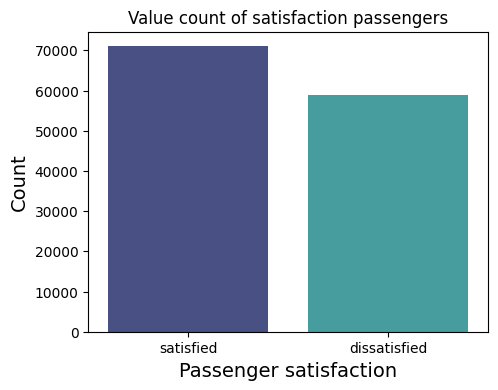

In [19]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df, x = 'satisfaction', palette='mako')
plt.title('Value count of satisfaction passengers')
ax.set_xlabel("Passenger satisfaction",fontsize=14)
ax.set_ylabel("Count",fontsize=14)

Notes : 
*    There is a significant difference between satisfied and dissatisfied passengers around 17024.

In [20]:
df['Gender'].value_counts()

female    65899
male      63981
Name: Gender, dtype: int64

Text(0, 0.5, 'Count')

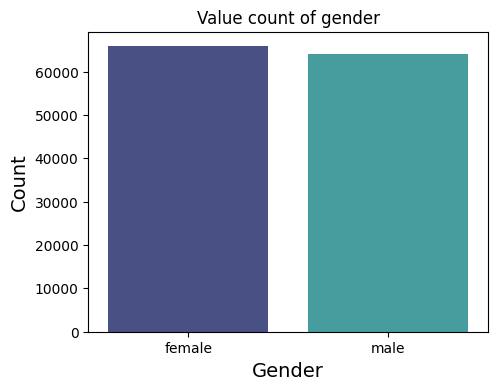

In [21]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df, x = 'Gender', palette='mako')
plt.title('Value count of gender')
ax.set_xlabel("Gender",fontsize=14)
ax.set_ylabel("Count",fontsize=14)

Notes : 
*    As we can see, the number of men and women is almost the same, there are only slight differences.

In [22]:
df['Customer Type'].value_counts()

loyal customer       106100
disloyal customer     23780
Name: Customer Type, dtype: int64

Text(0, 0.5, 'Count')

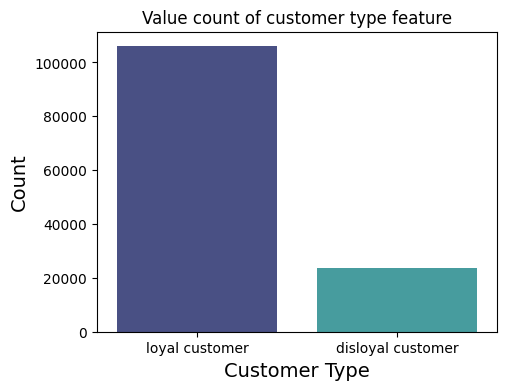

In [23]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df, x = 'Customer Type', palette='mako')
plt.title('Value count of customer type feature')
ax.set_xlabel("Customer Type",fontsize=14)
ax.set_ylabel("Count",fontsize=14)

Notes : 
*    There is a very big difference, where the number of loyal customers is far more than disloyal.

In [24]:
df['Type of Travel'].value_counts()

business travel    89693
personal travel    40187
Name: Type of Travel, dtype: int64

Text(0, 0.5, 'Count')

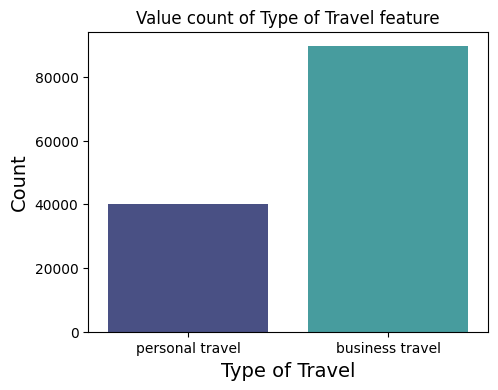

In [25]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df, x = 'Type of Travel', palette='mako')
plt.title('Value count of Type of Travel feature')
ax.set_xlabel("Type of Travel",fontsize=14)
ax.set_ylabel("Count",fontsize=14)

Notes : 
*    The number of Business Travel is much more than Personal Travel. That means we work more with Customers at the Business Layer.

In [26]:
df['Class'].value_counts()

business    62160
eco         58309
eco plus     9411
Name: Class, dtype: int64

Text(0, 0.5, 'Count')

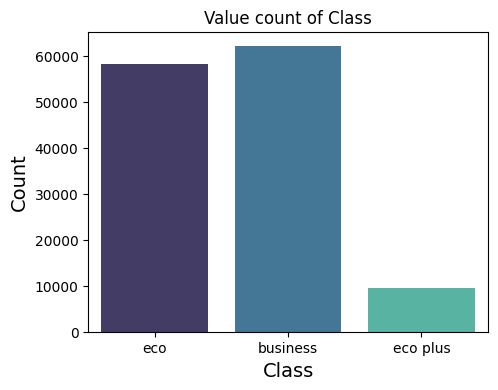

In [27]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df, x = 'Class', palette='mako')
plt.title('Value count of Class')
ax.set_xlabel("Class",fontsize=14)
ax.set_ylabel("Count",fontsize=14)

Notes : 
*    Customers prefer business or economy class over economy plus class

In [28]:
df['Checkin service'].value_counts()

4    36481
3    35538
5    27005
2    15486
1    15369
0        1
Name: Checkin service, dtype: int64

Text(0, 0.5, 'Count')

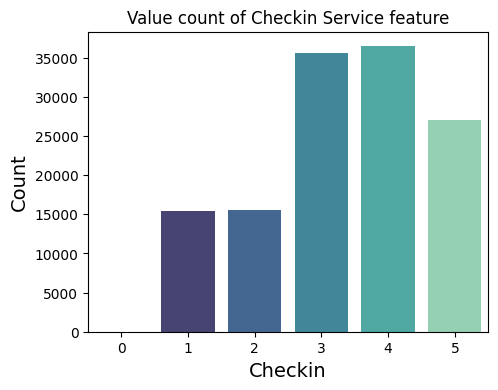

In [29]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df, x = 'Checkin service', palette='mako')
plt.title('Value count of Checkin Service feature')
ax.set_xlabel("Checkin",fontsize=14)
ax.set_ylabel("Count",fontsize=14)

Notes : 

*  Most passengers give a value of 3-5 for check-in services. This means that passengers are quite satisfied with the check-in service.


In [30]:
df['Age'].describe()

count    129880.000000
mean         39.427957
std          15.119360
min           7.000000
25%          27.000000
50%          40.000000
75%          51.000000
max          85.000000
Name: Age, dtype: float64

Text(0.5, 1.0, 'Distribution of Age')

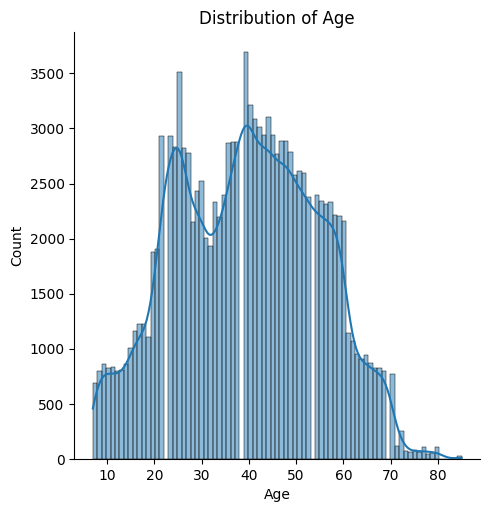

In [36]:
sns.displot(data = df['Age'], palette='mako', kde=True, height = 5)
plt.title('Distribution of Age')

Notes : 

*  The average age of passengers is around 39 years
*   Only a few children were passengers



In [32]:
df['Flight Distance'].describe()

count    129880.000000
mean       1981.409055
std        1027.115606
min          50.000000
25%        1359.000000
50%        1925.000000
75%        2544.000000
max        6951.000000
Name: Flight Distance, dtype: float64

Text(0.5, 1.0, 'Distribution of Flight Distance')

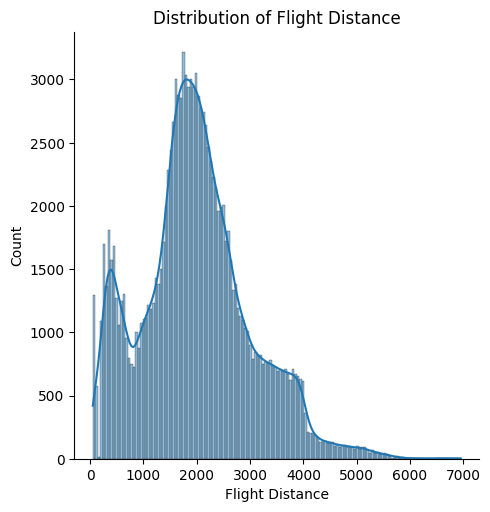

In [37]:
sns.displot(data = df['Flight Distance'], palette='mako', kde=True, height = 5)
plt.title('Distribution of Flight Distance')

Notes:

*   Average of flight distances is 1981 km. That means we don't spend a lot of time in the air.
*   From the diagram above shows the most frequent flights with a range of 1000 - 3000 km



In [38]:
df[['Age','Flight Distance']].agg(['skew','kurtosis']).transpose()

,skew,kurtosis
Age,-0.003606,-0.719140
Flight Distance,0.466748,0.364306


Notes : 

*   Age has a skew of less than 0, the distribution is slightly negative or skewed to the left, which means the mean < median.
*   Flight Distance has a skew of more than 0, the distribution tends to be positive or skewed to the right, which means the mean > median.
*   All of them have a kurtosis of less than 3, which is called platykurtic, which means they tend to produce fewer and less extreme outliers than the normal distribution.

In [39]:
df[['Departure Delay in Minutes','Arrival Delay in Minutes']].describe()

,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000
mean,14.713713,15.045465
std,38.071126,38.416353
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,12.000000,13.000000
max,1592.000000,1584.000000


<function matplotlib.pyplot.show(close=None, block=None)>

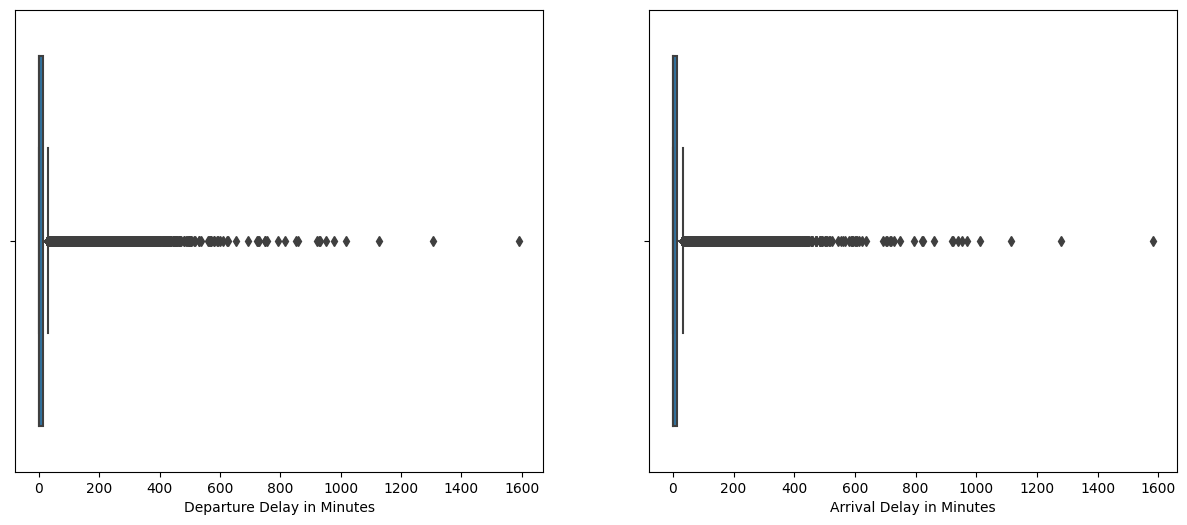

In [41]:
fig = plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(x=df["Departure Delay in Minutes"])
plt.subplot(1,2,2)
sns.boxplot(x=df["Arrival Delay in Minutes"])

plt.show

Notes : 

*   Average of Departure Delay is 14 Minutes, and Arrival Delays about 15 minutes.

*   Between arrival and departure delays have a similar boxplot diagram, meaning that these two features have a significant correlation. Any delay in departure will cause a delay in arrival

## Bivariate Analysist

### Predictor Variable VS Target Variable

<function matplotlib.pyplot.show(close=None, block=None)>

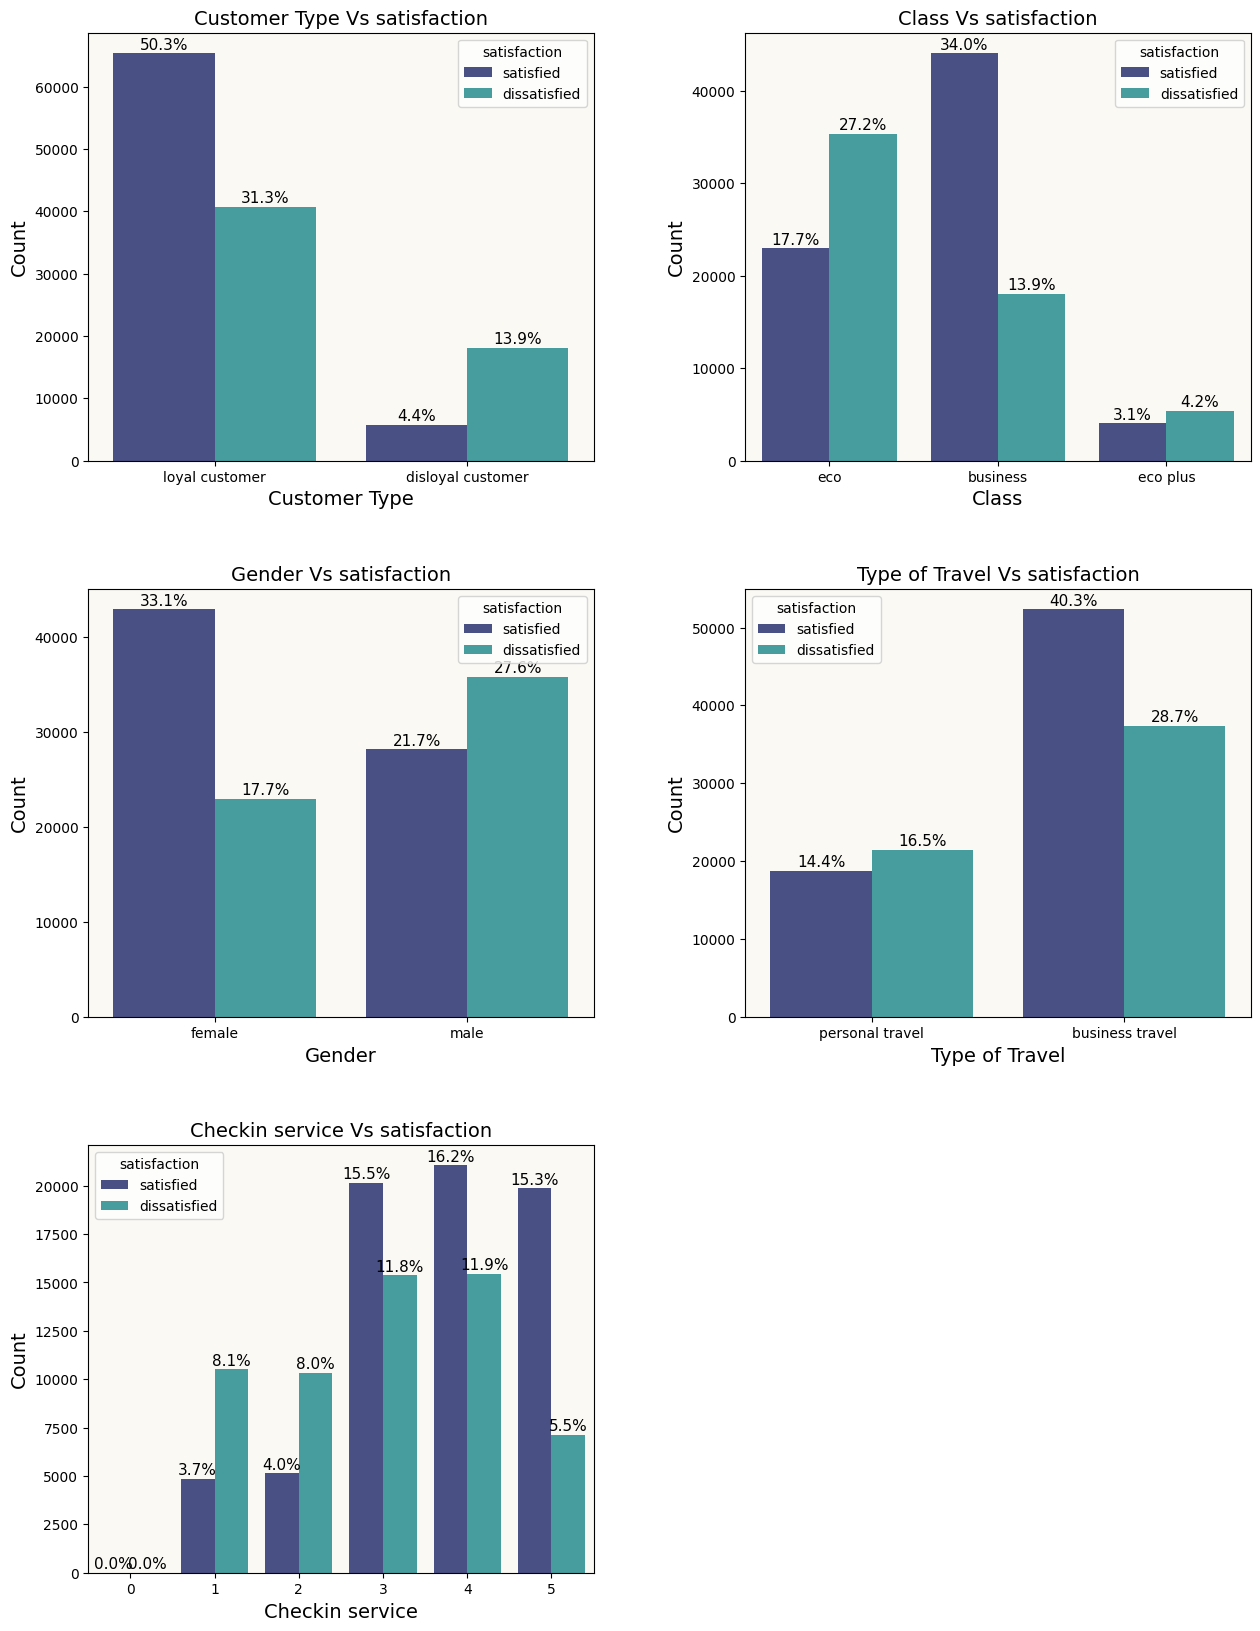

In [42]:
cols = ['Customer Type','Class','Gender','Type of Travel','Checkin service']

plt.figure(figsize=(15, 20))
plt.subplots_adjust(hspace=0.3,wspace=0.3)

for n, col in enumerate(cols):
    # add a new subplot iteratively
    ax = plt.subplot(3, 2, n + 1)
    plotBivariate(col,'satisfaction')

plt.show

Notes : 

*   It can be seen that Disloyal Customers have more dissatisfaction and it makes sense because they are not loyal customers.
But in Loyal Customers also have more dissatisfaction and it becomes a problem. We must know the cause of this problem occurs.
*   For flights with economy class, more passengers are dissatisfied. We have to find out what causes it.
*   Flights with business class, the average passenger is satisfied.
*   For female passengers, they are more satisfied with their flights, in contrast to men who are dissatisfied.
*   We're not good at Personal Travel because there are more dissatisfied customers than satisfied customers.  That could explain why there are more Business Travel than Personal.
*   In Business Travel, there are more satisfied than dissatisfied customers and that's good, very good, but still the number of dissatisfied customers is not small. So we have to find out what causes it.
*   Checkin service with a score below 3 on average feels dissatisfied while a score above 3 feels satisfied

## Other Variable VS Customer Type

<function matplotlib.pyplot.show(close=None, block=None)>

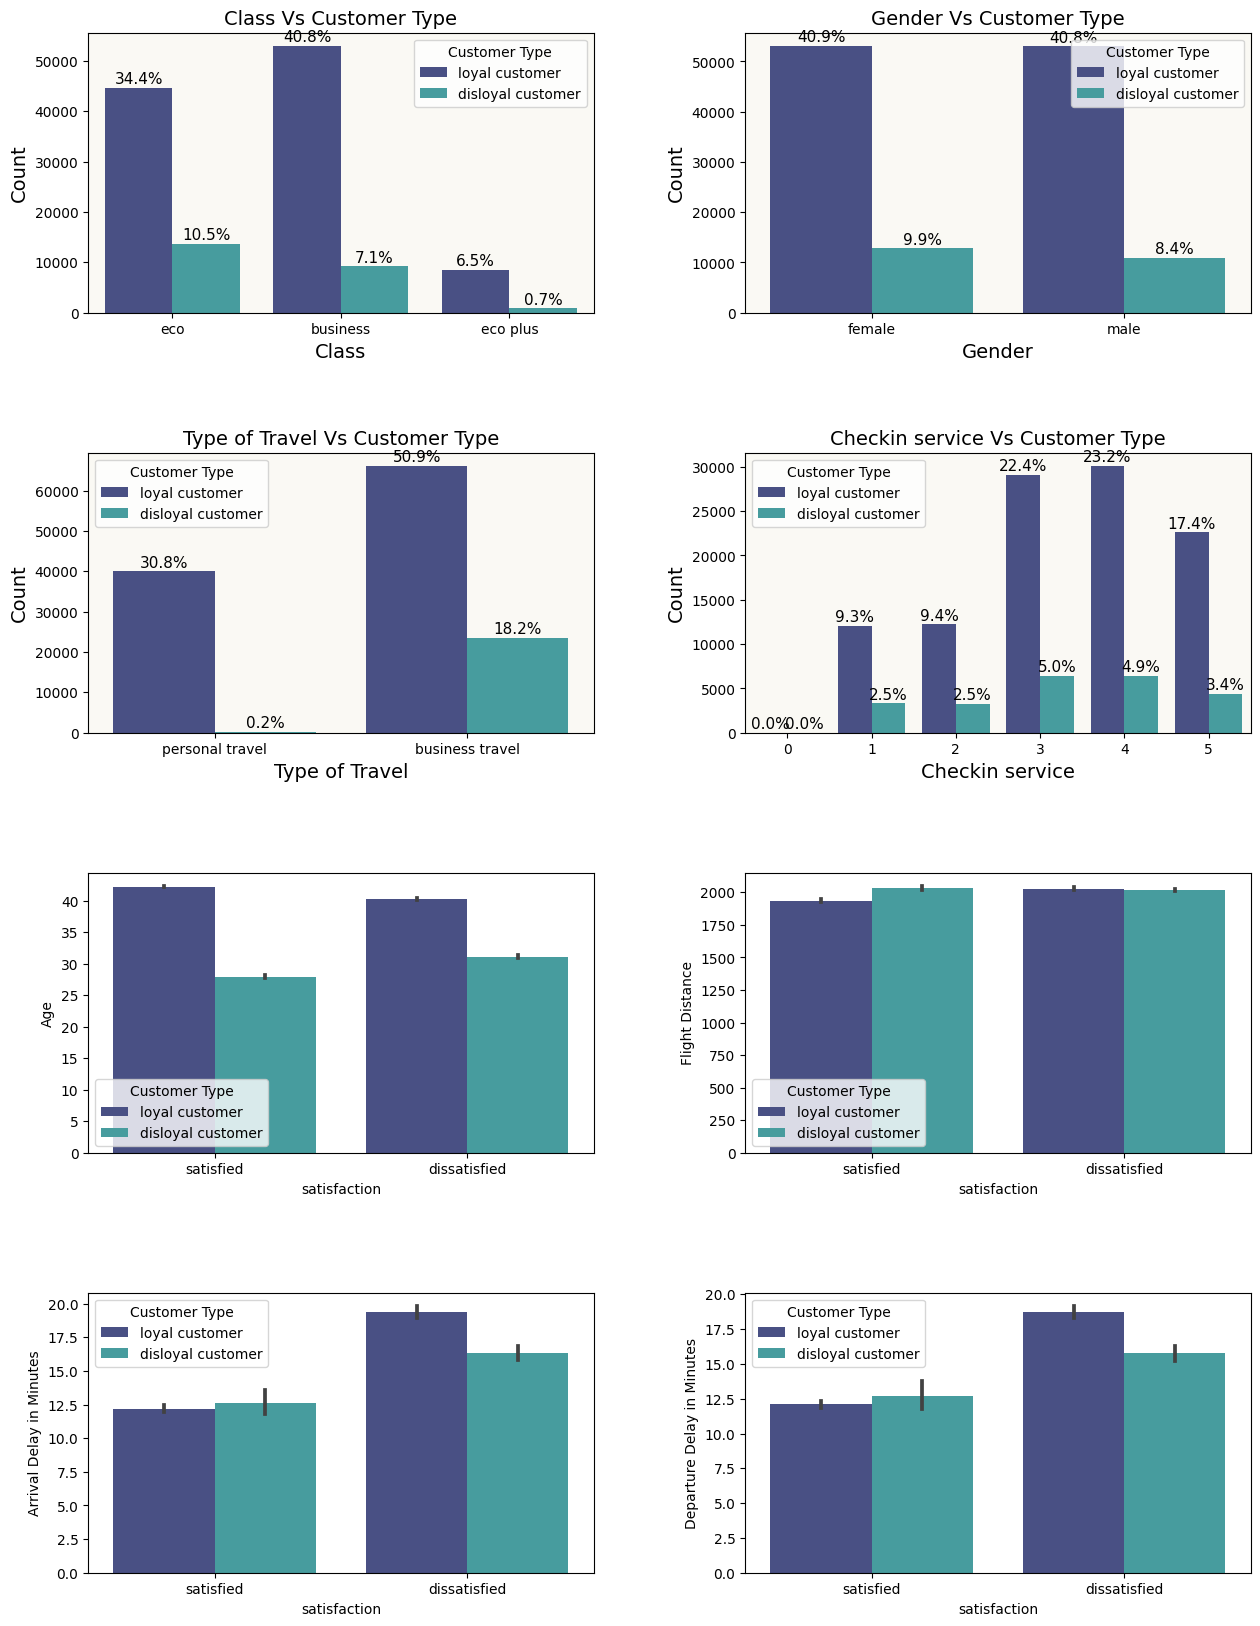

In [43]:
cols = ['Class','Gender','Type of Travel','Checkin service','Age','Flight Distance','Arrival Delay in Minutes','Departure Delay in Minutes']

plt.figure(figsize=(15, 20))
plt.subplots_adjust(hspace=0.5,wspace=0.3)

for n, col in enumerate(cols):
    # add a new subplot iteratively
    ax = plt.subplot(4, 2, n + 1)
    if n <= 3:
      plotBivariate(col,'Customer Type')
    else :
      sns.barplot(data = df, x = 'satisfaction', y = col, hue = 'Customer Type', palette='mako')
      
plt.show

Notes : 

*   Loyal customers prefer business class for their flights, while disloyal customers prefer economy class. This is one of the reasons why in economy class there are many dissatisfied customers.
*   Both of them make more business travel than personal travel. Almost all disloyal customers do business travel.
*   For disloyal customers, flight distance does not affect the number of satisfied and dissatisfied is almost the same.
*   Meanwhile, loyal customers feel a little more satisfied for long-distance flights.
*   Loyal customers who feel dissatisfied are mostly felt by those under 40 years of age.
*   Both loyal and disloyal customer feel satisfy when delay is not beyond 12.5 Minutes.


## Other Variable VS Class

<function matplotlib.pyplot.show(close=None, block=None)>

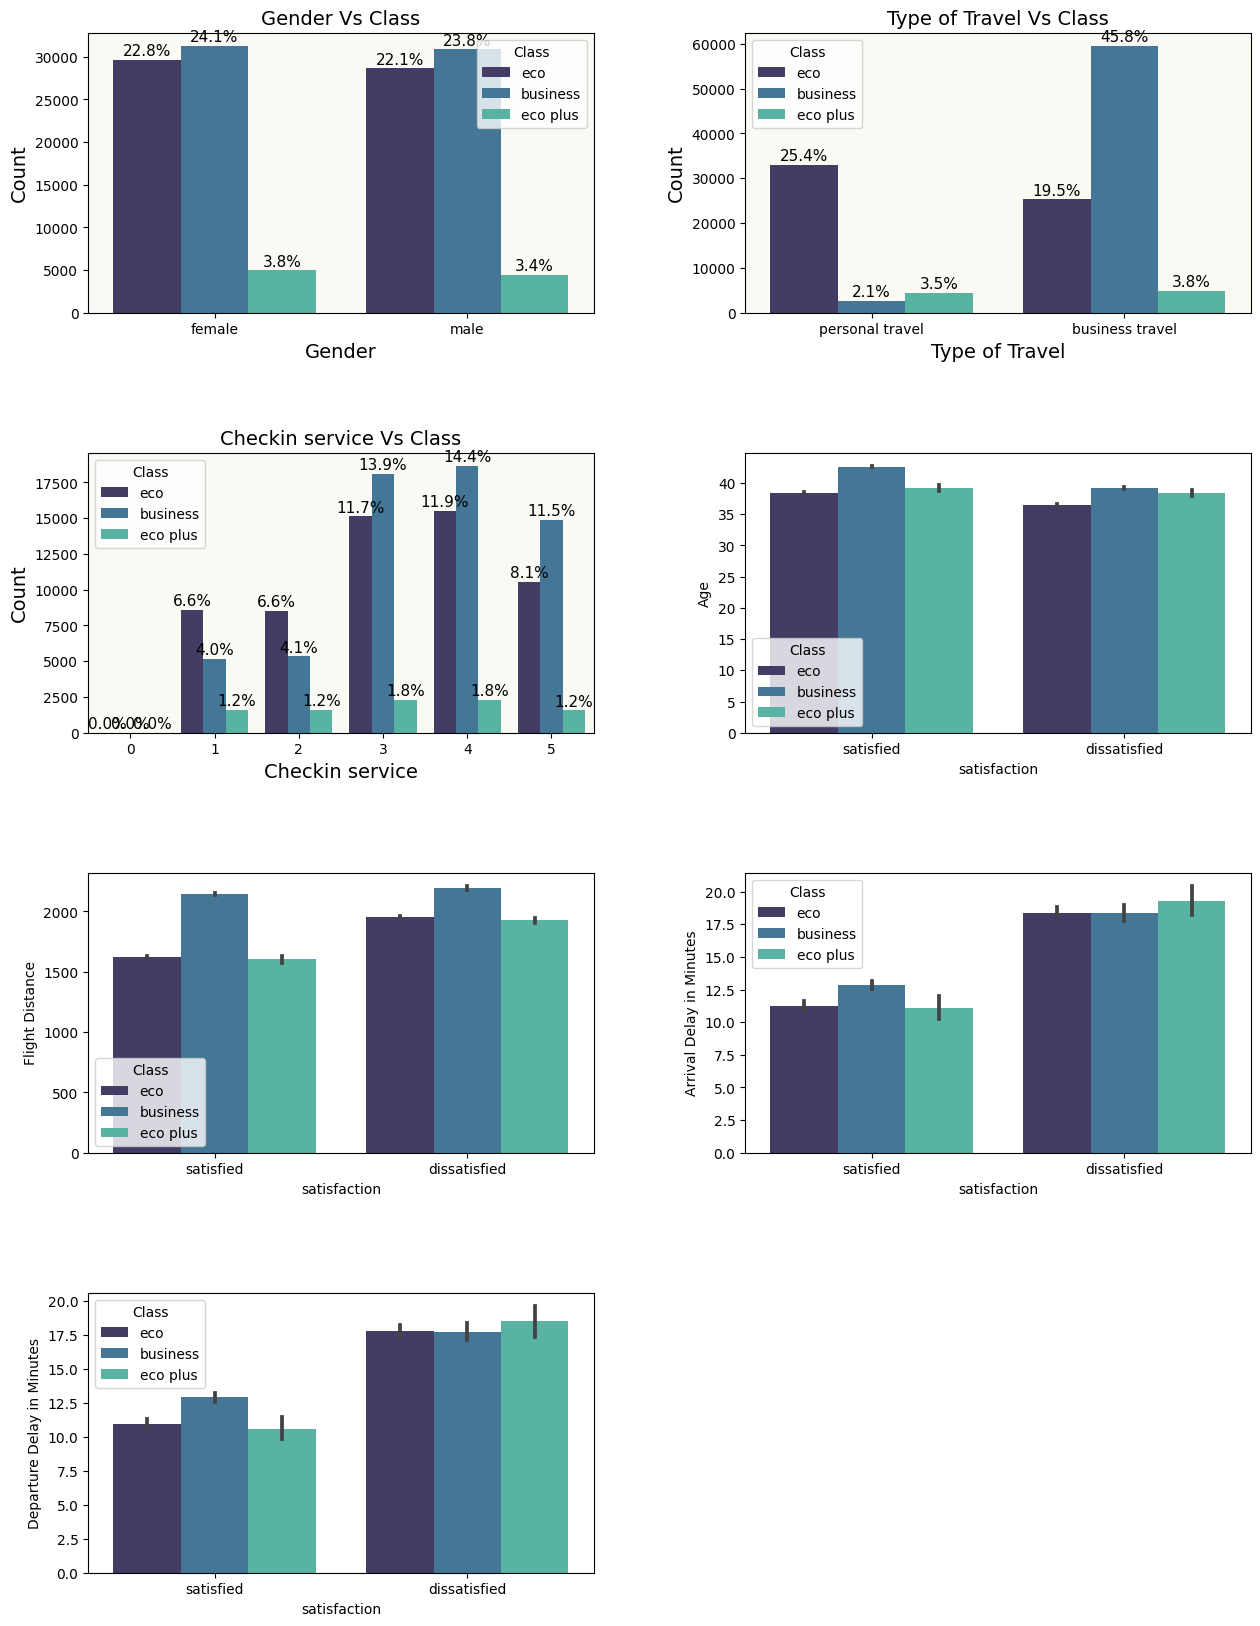

In [44]:
cols = ['Gender','Type of Travel','Checkin service','Age','Flight Distance','Arrival Delay in Minutes','Departure Delay in Minutes']

plt.figure(figsize=(15, 20))
plt.subplots_adjust(hspace=0.5,wspace=0.3)

for n, col in enumerate(cols):
    # add a new subplot iteratively
    ax = plt.subplot(4, 2, n + 1)
    if n <= 2:
      plotBivariate(col,'Class')
    else :
      sns.barplot(data = df, x = 'satisfaction', y = col, hue = 'Class', palette='mako') 

plt.show

Notes : 

*   There are still many customers with business travel who get economy class. This is the reason why many business travel customers are still dissatisfied. Business travel customers should get business class.
*   Customers in economy class are vulnerable to feeling dissatisfied when flying long distances.
*   As long as the delay does not exceed 12.5 minutes, passengers in all classes are satisfied.

## Pairplot

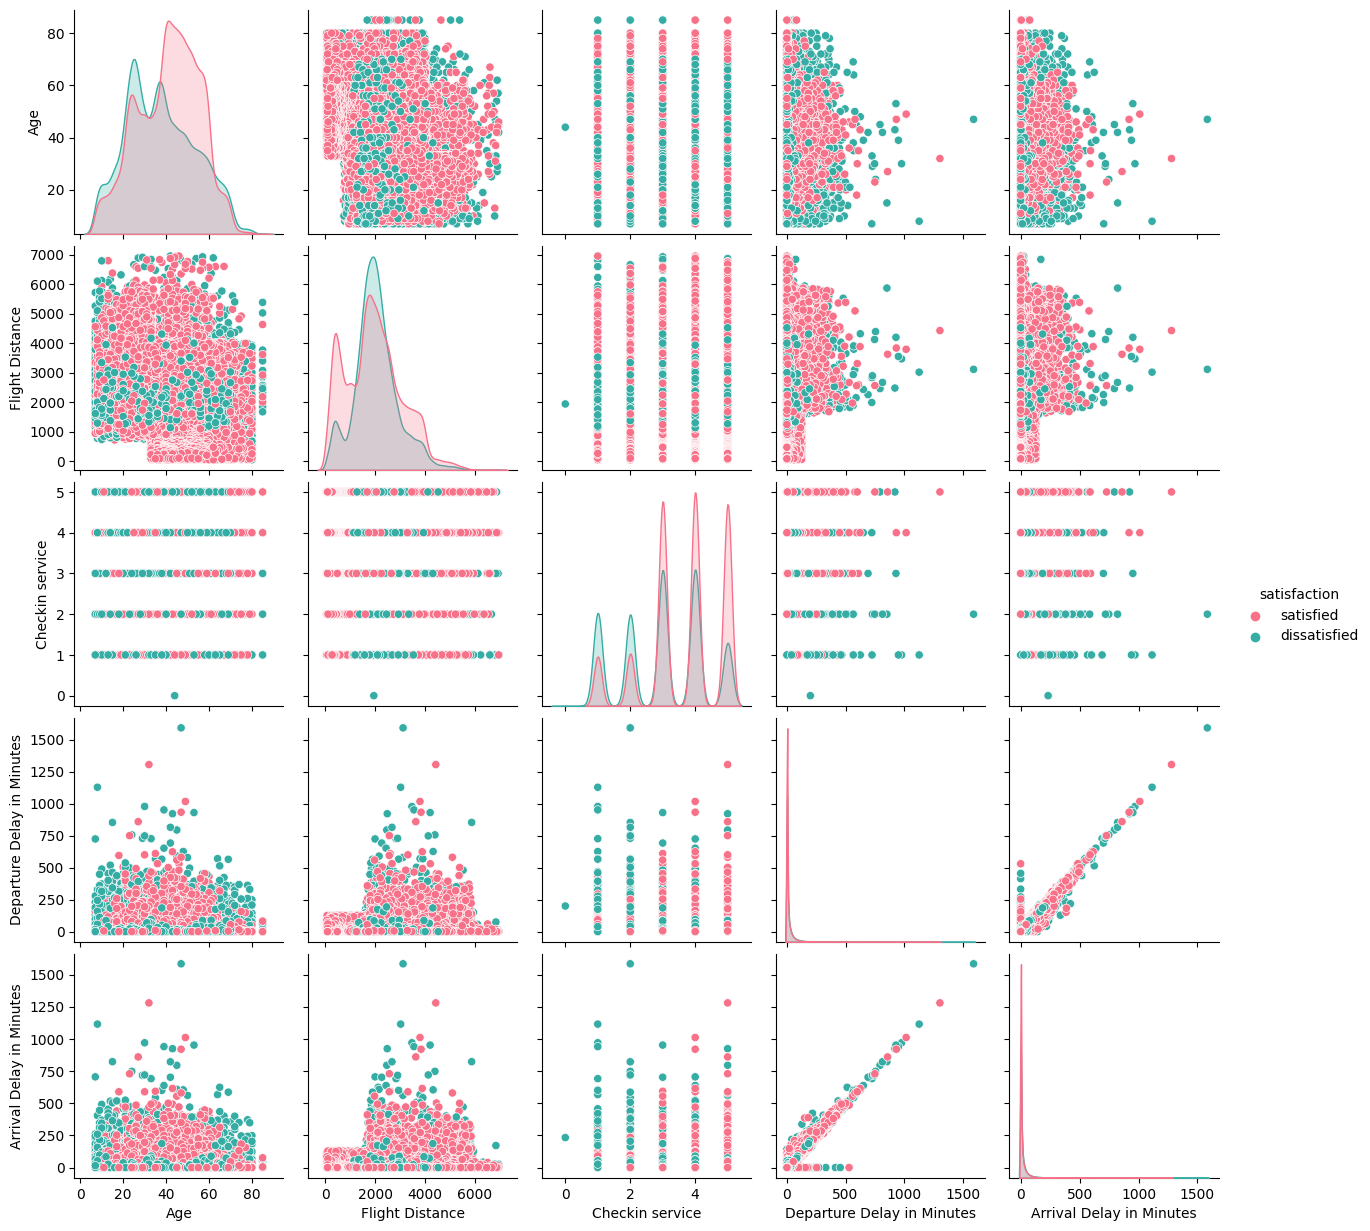

In [ ]:
sns.pairplot(df, hue='satisfaction', palette='husl')

## Mapping categorical data into numeric

In [45]:
mapping_satisfaction = {'dissatisfied' : 0, 'satisfied' : 1}
df['satisfaction'] = df['satisfaction'].map(mapping_satisfaction)
df['satisfaction'] = df['satisfaction'].astype(int)

In [46]:
mapping_cust = {'loyal customer':1,'disloyal customer':0}
df['Customer Type'] = df['Customer Type'].map(mapping_cust)
df['Customer Type'] = df['Customer Type'].astype(int)

In [47]:
mapping_class = {'business':2,'eco':0,'eco plus':1}
df['Class'] = df['Class'].map(mapping_class)
df['Class'] = df['Class'].astype(int)

In [48]:
mapping_gender = {'male':0,'female':1}
df['Gender'] = df['Gender'].map(mapping_gender)
df['Gender'] = df['Gender'].astype(int)

In [49]:
mapping_type = {'personal travel':0,'business travel':1}
df['Type of Travel'] = df['Type of Travel'].map(mapping_type)
df['Type of Travel'] = df['Type of Travel'].astype(int)

In [50]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   Customer Type               129880 non-null  int64
 1   Class                       129880 non-null  int64
 2   Gender                      129880 non-null  int64
 3   Age                         129880 non-null  int64
 4   Type of Travel              129880 non-null  int64
 5   Flight Distance             129880 non-null  int64
 6   Checkin service             129880 non-null  int64
 7   Departure Delay in Minutes  129880 non-null  int64
 8   Arrival Delay in Minutes    129880 non-null  int64
 9   satisfaction                129880 non-null  int64
dtypes: int64(10)
memory usage: 9.9 MB


# Modelling

## Separating independent variables  and dependent variables

In [98]:
X = df.drop(['satisfaction'],axis = 1)
y = df['satisfaction']

## Feature Selection

### Pearson Correlation

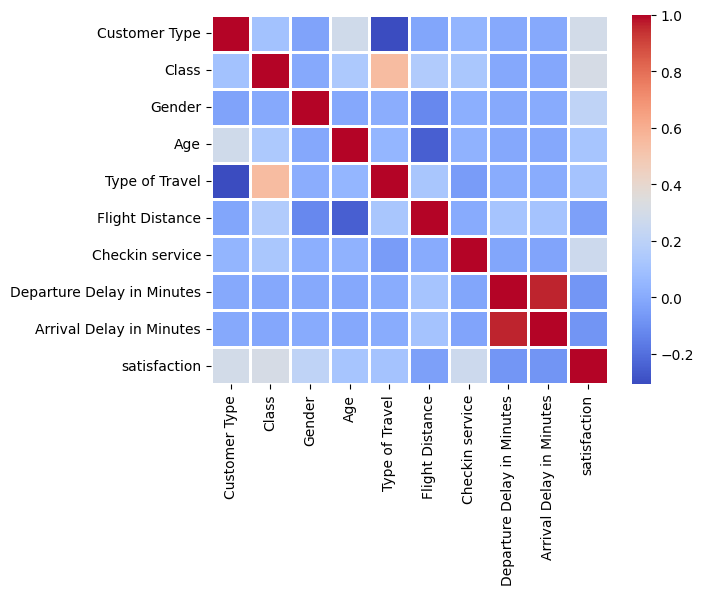

In [99]:
# Feature selection using Pearson Correlation
ax = sns.heatmap(df.corr(), cmap = "coolwarm", annot=False, linewidth=2)

Notes :

*   The arrival and departure columns show a strong correlation or relationship between two or more independent variables (multicolinearity), so we can delete one of these columns.

In [100]:
correlation = (pd.DataFrame(abs(df.corr()).satisfaction))
correlation.sort_values(by='satisfaction', ascending=False).style.background_gradient(cmap='coolwarm_r')

,satisfaction
satisfaction,1.000000
Class,0.305535
Customer Type,0.292592
Checkin service,0.266179
Gender,0.212236
Age,0.117971
Type of Travel,0.109239
Arrival Delay in Minutes,0.080487
Departure Delay in Minutes,0.073909
Flight Distance,0.039224


### KBest using F-test

In [101]:
# Feature Selection using F-test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
clf = SelectKBest(f_classif, k=8)
clf = clf.fit(X, y)
clf.get_feature_names_out()

array(['Customer Type', 'Class', 'Gender', 'Age', 'Type of Travel',
       'Checkin service', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'], dtype=object)

### Feature Selection using Ridge regression algorithm model 

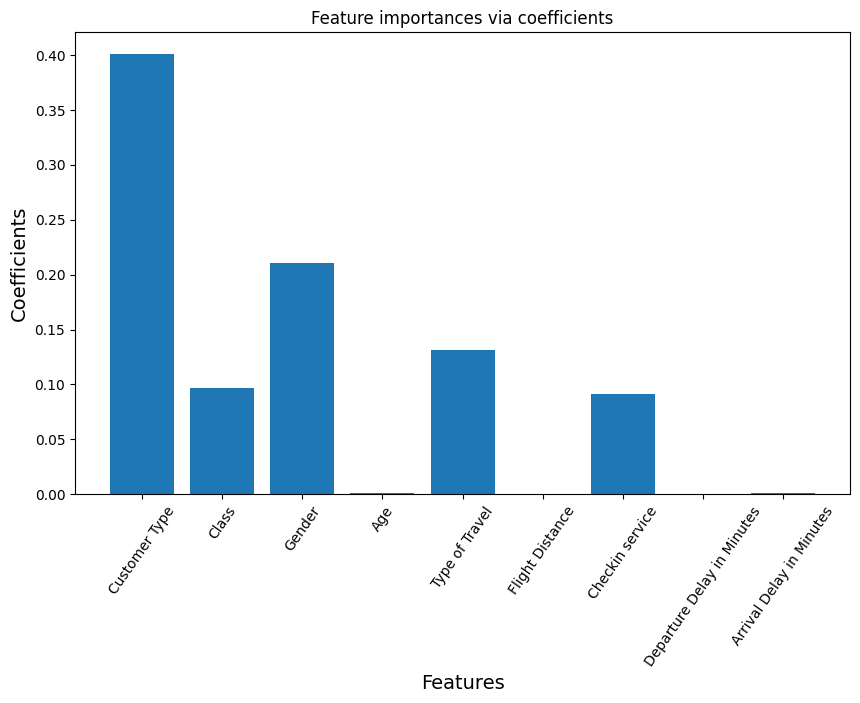

In [102]:
# Feature Selection using Ridge regression algorithm model 
from sklearn.linear_model import RidgeCV

ridge = RidgeCV(alphas=np.logspace(-6, 6, num=5)).fit(X, y)
importance = np.abs(ridge.coef_)
feature_names = np.array(X.columns)

#ploting Feature importances vs coefficients
plt.figure(figsize=(10,6))
ax = plt.subplot()
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
ax.set_xlabel('Features', fontsize=14)
ax.set_ylabel('Coefficients',fontsize=14)
ax.tick_params(axis='x', rotation=55)

plt.show()

Notes :

*   From the three feature selection methods above, the results are not much different. The 3 features that don't matter much are Arrival Delay in Minutes, Departure Delay in Minutes, and Flight Distance.
*   Flight Distance being the least influential feature.
*   The arrival and departure columns show a strong correlation or relationship between two or more independent variables (multicolinearity), so we can delete one of these columns.
*   Therefore we will remove the flight distance and Departure Delay in Minutes.



In [103]:
#X.drop(['Departure Delay in Minutes','Age'],axis=1,inplace=True)
X.drop(['Departure Delay in Minutes'],axis=1,inplace=True)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 8 columns):
 #   Column                    Non-Null Count   Dtype
---  ------                    --------------   -----
 0   Customer Type             129880 non-null  int64
 1   Class                     129880 non-null  int64
 2   Gender                    129880 non-null  int64
 3   Age                       129880 non-null  int64
 4   Type of Travel            129880 non-null  int64
 5   Flight Distance           129880 non-null  int64
 6   Checkin service           129880 non-null  int64
 7   Arrival Delay in Minutes  129880 non-null  int64
dtypes: int64(8)
memory usage: 7.9 MB


## Train Test Split

In [104]:
from collections import Counter
from sklearn.model_selection import train_test_split,cross_val_score,RandomizedSearchCV
X_train ,X_test,y_train ,y_test = train_test_split(X,y,test_size =0.1 , random_state=42 , stratify=y)

## Scalling

In [105]:
# Using Standard Scalling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)

In [121]:
# Save the scaler for later use when deploying the model
import pickle
pickle.dump(scaler, open('scaler.pkl','wb'))

## Run All Model Training

In [111]:
from sklearn.linear_model import LogisticRegression ,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

In [112]:
models = {'Logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'Decision Tree': DecisionTreeClassifier(),
         'Random Forest': RandomForestClassifier(),
         'Gradient Boosting Classifier':GradientBoostingClassifier(),
         'Stochastic Gradien Descent': SGDClassifier(),
         'Naive Bayes': GaussianNB(),
         'xgb Classifier': XGBClassifier(),
         'Bagging Classifier': BaggingClassifier(),
         'Boosting': AdaBoostClassifier(),
         'MLP': MLPClassifier(),
         'LDA': LinearDiscriminantAnalysis(),
         'QDA': QuadraticDiscriminantAnalysis()}

In [124]:
def fit_score(models, X_train, X_test, y_train, y_test):

    # Define the number of folds for cross-validation
    num_folds = 10

    # Split the dataset into folds
    kfold = KFold(n_splits=num_folds, shuffle=True)
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = cross_val_score(model,X_train,y_train,scoring='accuracy',cv=kfold, error_score='raise').mean()

    return model_scores

In [125]:
model_scores = fit_score(models,X_train_scaled,X_test_scaled,y_train,y_test)
model_scores

{'Logistic Regression': 0.7510351195486153,
 'KNN': 0.7945968151935378,
 'Decision Tree': 0.738331050644516,
 'Random Forest': 0.788907623809858,
 'Gradient Boosting Classifier': 0.8106799378035296,
 'Stochastic Gradien Descent': 0.7551415004828957,
 'Naive Bayes': 0.7182784271965461,
 'xgb Classifier': 0.8158043698970194,
 'Bagging Classifier': 0.7823032943682072,
 'Boosting': 0.7430877143089865,
 'MLP': 0.8152739866929061,
 'LDA': 0.7506331279852576,
 'QDA': 0.7803785182284442}

Notes :

*   XGB Classifier has the best accuracy among other models (0.816/ 81,6 %).

*   The accuracy obtained is quite good. So we can choose the XGB Classifier model as our prediction model.

In [ ]:
xgboost = XGBClassifier()
xgboost.fit(X_train_scaled, y_train)

In [118]:
import pickle
pickle.dump(xgboost, open('xgboost.pkl','wb'))

In [116]:
y_pred = xgboost.predict(X_test_scaled)

### Confusion Matrix for XGBoost

<Axes: >

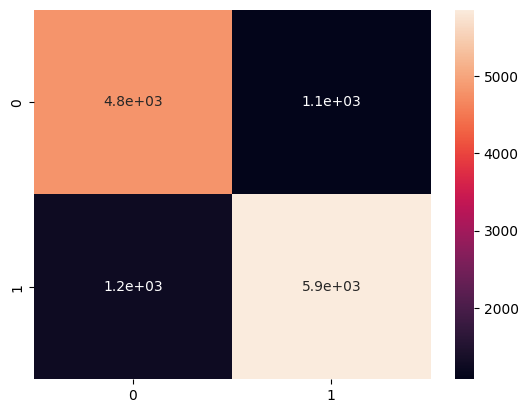

In [117]:
from sklearn.metrics import confusion_matrix, classification_report
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)) , annot=True)

In [70]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      5879
           1       0.84      0.82      0.83      7109

    accuracy                           0.82     12988
   macro avg       0.82      0.82      0.82     12988
weighted avg       0.82      0.82      0.82     12988



### ROC & AUC for XGBoost

In [71]:
from sklearn.metrics import roc_curve, roc_auc_score

xgb_probs = xgboost.predict_proba(X_test_scaled)
random_probs = [0 for _ in range(len(y_test))]


In [72]:
xgb_probs = xgb_probs[:,1]

In [75]:
# Calculate AUC for a random model
random_auc = roc_auc_score(y_test, random_probs)
 
# Calculate AUC for a XGBoost classifier
xgb_auc = roc_auc_score(y_test, xgb_probs)
 
# Show the result
print('Random Prediction : AUCROC = %.3f' % (random_auc))
print('XGBoost : AUCROC = %.3f' % (xgb_auc))

Random Prediction : AUCROC = 0.500
XGBoost : AUCROC = 0.896


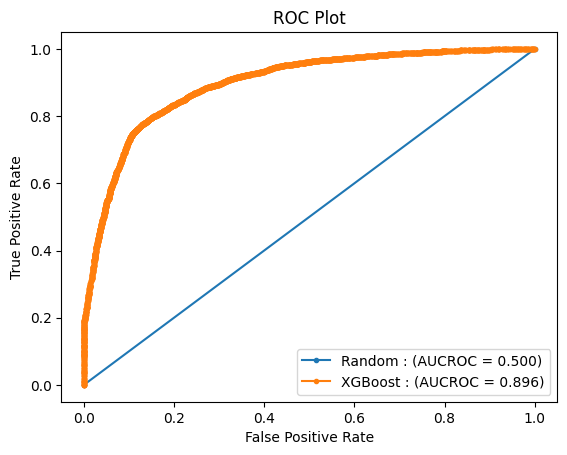

In [76]:
# Stores the values ​​needed to create the ROC curve (false positive rate, true positive rate)
random_fpr, random_tpr, _ = roc_curve(y_test, random_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
 
# Plot ROC curve
plt.plot(random_fpr, random_tpr, marker='.', label='Random : (AUCROC = %.3f)' % random_auc)
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='XGBoost : (AUCROC = %.3f)' % xgb_auc)
 
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Hyperparameter Tuning

## Find the best estimator using cross validation

In [77]:
np.random.seed(42)
params = {"n_estimators": [50,100,200, 300] ,
 'max_depth': [1,3,18],
        'gamma': [1,9],
        'reg_alpha' : [40,180,1],
        'reg_lambda' :[0,1],}


xg = RandomizedSearchCV(XGBClassifier(),
                                param_distributions=params,
                                cv=4,
                                n_iter=100,
                                verbose=1,
                              refit=True,
                                n_jobs=-1
                               )

xg.fit(X_train_scaled, y_train)
xg.best_params_

Fitting 4 folds for each of 100 candidates, totalling 400 fits


{'reg_lambda': 1,
 'reg_alpha': 1,
 'n_estimators': 50,
 'max_depth': 18,
 'gamma': 9}

In [78]:
xg.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=9, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=18, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [79]:
xg.best_score_

0.8168223659446326

In [80]:
model = XGBClassifier(reg_lambda = 1, reg_alpha = 1, n_estimators = 50, max_depth = 18, gamma = 9)
model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=9, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=18, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [81]:
y_pred = model.predict(X_test_scaled)

## Confusion Matrix

<Axes: >

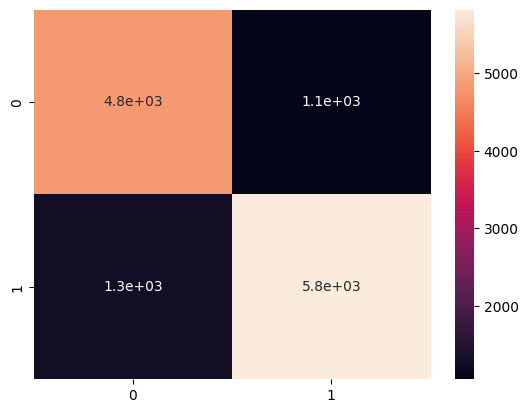

In [82]:
from sklearn.metrics import confusion_matrix, classification_report
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred)) , annot=True)

## Classification Report

In [83]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      5879
           1       0.85      0.82      0.83      7109

    accuracy                           0.82     12988
   macro avg       0.82      0.82      0.82     12988
weighted avg       0.82      0.82      0.82     12988



In [84]:
from sklearn.metrics import roc_curve, roc_auc_score

xgb_probs_hpt = model.predict_proba(X_test_scaled)
random_probs = [0 for _ in range(len(y_test))]

In [85]:
xgb_probs_hpt = xgb_probs_hpt[:,1]

In [86]:
# Calculate AUC for a random model
random_auc = roc_auc_score(y_test, random_probs)
 
# Calculate AUC for a XGBoost classifier
xgb_hpt_auc = roc_auc_score(y_test, xgb_probs_hpt)
 
# Show the rersult:
print('Random Prediction : AUCROC = %.3f' % (random_auc))
print('XGBoost : AUCROC = %.3f' % (xgb_hpt_auc))

Random Prediction : AUCROC = 0.500
XGBoost : AUCROC = 0.898


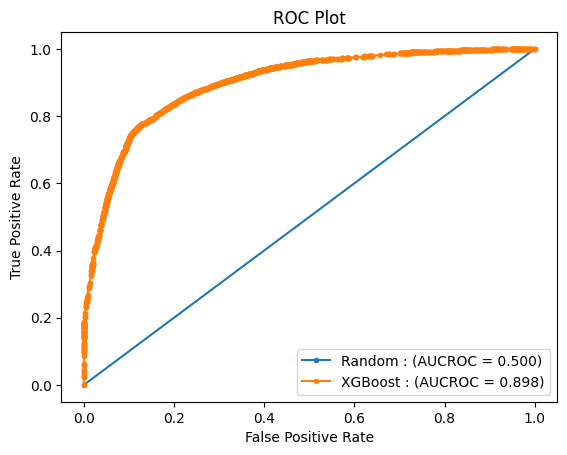

In [87]:
# Stores the values ​​needed to create the ROC curve (false positive rate, true positive rate)
random_fpr, random_tpr, _ = roc_curve(y_test, random_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs_hpt)
 
# Plot ROC 
plt.plot(random_fpr, random_tpr, marker='.', label='Random : (AUCROC = %.3f)' % random_auc)
plt.plot(xgb_fpr, xgb_tpr, marker='.', label='XGBoost : (AUCROC = %.3f)' % xgb_hpt_auc)
 
plt.title('ROC Plot')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Artificial Neural Network

In [88]:
from tensorflow import keras
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=10)

In [89]:
Model=keras.Sequential([keras.layers.Dense(100,activation='relu'),
                        keras.layers.Dense(50,activation='relu')
                        ,keras.layers.Dense(25,activation='relu'),
                           keras.layers.Dense(1,activation='sigmoid')])

In [90]:
Model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
history=Model.fit(X_train_scaled,y_train,epochs=128,batch_size=64,validation_split=0.2,callbacks=[callback],verbose=1)

Epoch 1/128
1462/1462 [==============================] - 6s 3ms/step - loss: 0.4421 - acc: 0.8010 - val_loss: 0.4255 - val_acc: 0.8059
Epoch 2/128
1462/1462 [==============================] - 4s 3ms/step - loss: 0.4223 - acc: 0.8106 - val_loss: 0.4241 - val_acc: 0.8098
Epoch 3/128
1462/1462 [==============================] - 3s 2ms/step - loss: 0.4179 - acc: 0.8116 - val_loss: 0.4146 - val_acc: 0.8142
Epoch 4/128
1462/1462 [==============================] - 3s 2ms/step - loss: 0.4156 - acc: 0.8129 - val_loss: 0.4125 - val_acc: 0.8128
Epoch 5/128
1462/1462 [==============================] - 5s 3ms/step - loss: 0.4139 - acc: 0.8134 - val_loss: 0.4134 - val_acc: 0.8127
Epoch 6/128
1462/1462 [==============================] - 3s 2ms/step - loss: 0.4127 - acc: 0.8141 - val_loss: 0.4119 - val_acc: 0.8139
Epoch 7/128
1462/1462 [==============================] - 3s 2ms/step - loss: 0.4121 - acc: 0.8137 - val_loss: 0.4129 - val_acc: 0.8127
Epoch 8/128
1462/1462 [==============================] 

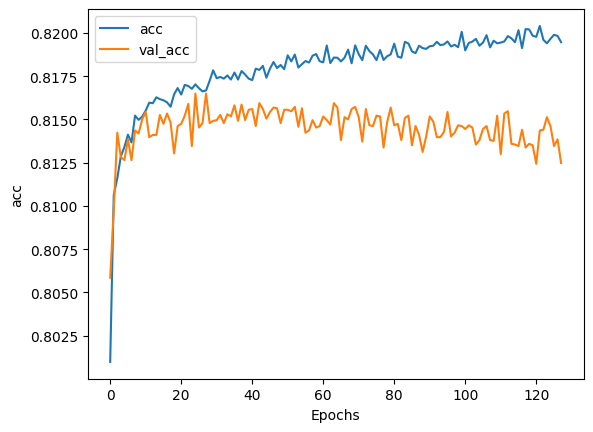

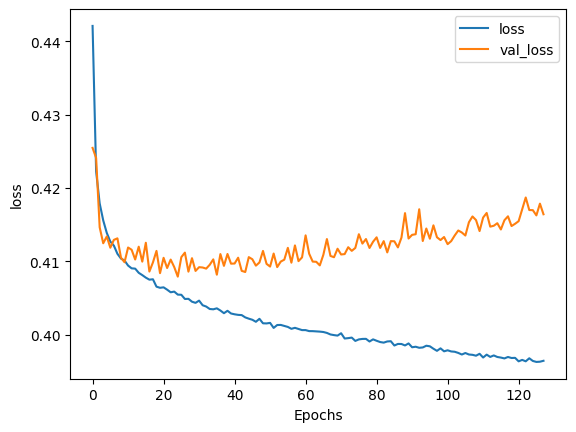

In [91]:
def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
  
plot_graphs(history, "acc")
plot_graphs(history, "loss")

In [92]:
y_pred_deep=Model.predict(X_test_scaled)

406/406 [==============================] - 1s 1ms/step


<Axes: >

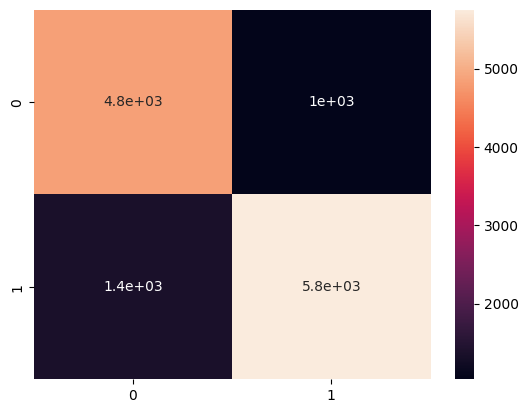

In [93]:
sns.heatmap(pd.DataFrame(confusion_matrix(y_test,y_pred_deep.round())) , annot=True)

In [94]:
print(classification_report(y_test, y_pred_deep.round()))

              precision    recall  f1-score   support

           0       0.78      0.82      0.80      5879
           1       0.85      0.81      0.83      7109

    accuracy                           0.82     12988
   macro avg       0.81      0.82      0.82     12988
weighted avg       0.82      0.82      0.82     12988



In [96]:
import pickle
pickle.dump(model, open('deep.pkl','wb'))